In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex":True})

In [2]:
MVN_4000_MASTER = np.load('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/master_version/samples/MVN_25k_MASTER.npy')
MVN_4000_MASTER, MVN_4000_MASTER.shape

(array([[ 0.16172609,  0.09183824, -0.12580597, ...,  4.86159858,
          1.5553384 , 10.30086003],
        [ 0.16266259,  0.07095649, -0.12455276, ...,  4.78063692,
          1.5605276 , 10.2241856 ],
        [ 0.16160545,  0.07665691, -0.12707366, ...,  4.79848154,
          1.29221794,  9.81899647],
        ...,
        [ 0.15891398,  0.06128877, -0.12805249, ...,  4.78325027,
          1.6255521 ,  9.93207862],
        [ 0.16260887,  0.07567519, -0.12446915, ...,  4.84055642,
          2.03662124, 10.25524795],
        [ 0.16067225,  0.04255759, -0.12890815, ...,  4.90296747,
          1.25109376, 10.41021844]]),
 (25000, 14))

In [3]:
for i in range(MVN_4000_MASTER.shape[0]):
    print('first point', MVN_4000_MASTER[i,:])
    break

first point [ 0.16172609  0.09183824 -0.12580597  1.01721746 -0.08472017 -0.37810776
  0.81556333  9.66630539  4.79028428  5.65795523  7.00927007  4.86159858
  1.5553384  10.30086003]


We see that this multivariate normal is a 2d array of size $N_{samples}\times N_{parameters}$ where above $N_{samples}=4,000, \ N_{parameters}=14$. But we want the multivariate gaussinan as a single number for each parameter set (for each point), since for a vector $z$, the multivariate normal is 
$$f(z ; \mu, \Sigma)=(2 \pi)^{-\left(\frac{N}{2}\right)} \operatorname{det}(\Sigma)^{-\frac{1}{2}} \exp \left(-.5(z-\mu)^{T} \Sigma^{-1}(z-\mu)\right)$$

In [4]:
COV_MASTER= np.load('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/master_version/samples/COV_MASTER.npy')
params_MASTER= np.load('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/master_version/samples/params_MASTER.npy')
COV_MASTER[0], params_MASTER[0]

(array([ 4.45e-06,  3.44e-06,  2.25e-06,  2.27e-06, -5.33e-06,  1.28e-06,
         1.23e-06,  3.32e-05, -2.41e-06, -2.81e-06,  5.41e-06, -9.82e-07,
        -2.68e-05,  2.50e-05]),
 0.16126)

In [5]:
def f(MVN, mu, sigma):
    """
    The density function of multivariate normal distribution.
    N = size of the mean vector, or number of parameter points (14)
    MVN = the 2D MV Gaussian function
    sigma = the covariance matrix from our best-fit values
    """

    MVN_per_point_l=[]
    for i in range(MVN.shape[0]):
        #z = np.atleast_2d(z)
        z = MVN[i,:]


        N = z.size

        temp1 = np.linalg.det(sigma) ** (-1/2)
        temp2 = np.exp(-.5 * (z - mu).T @ np.linalg.inv(sigma) @ (z - mu))
        MVN_per_point = (2 * np.pi) ** (-N/2) * temp1 * temp2
        MVN_per_point_l.append(MVN_per_point)
    return np.array(MVN_per_point_l)

In [115]:
MVN_per_point_l = f(MVN_4000_MASTER, params_MASTER, COV_MASTER); MVN_per_point_l

array([1.57292724e+14, 3.38937034e+13, 1.29186440e+14, ...,
       1.87757908e+14, 6.29903331e+13, 3.53642259e+12], dtype=float128)

In [7]:
MVN_per_point_l.shape

(25000,)

Text(0.5, 1.0, 'Multivariate Normal per point')

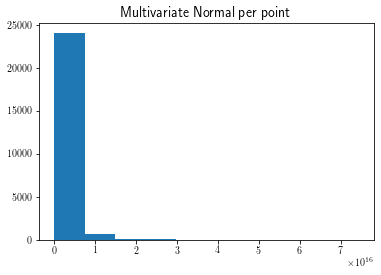

In [8]:
plt.hist(MVN_per_point_l)
plt.title('Multivariate Normal per point', fontsize=14)

### load $\chi^2$ array

In [48]:
chi2_array_ALL_DATA_4k = np.load('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/master_version/local/ALL_DATA_25k/chi2_array_ALL_DATA_25k.npy')
chi2_array_ALL_DATA_4k, chi2_array_ALL_DATA_4k.shape

(array([ 2998.10701678,  4317.46057659, 26647.71318231, ...,
         7382.79847075, 12768.91606837,  3205.31067653]),
 (25000,))

the mean and std of $\chi^2$ are respectively 12770.200285177548967 525317.48879534142515


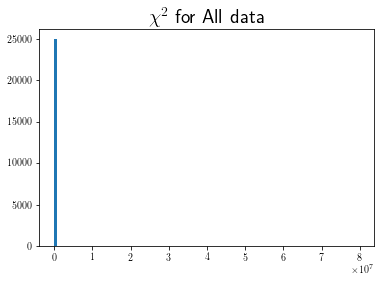

In [34]:
#to avoid overflow take data type as float 128 to handle exponentiation
chi2_array_ALL_DATA_4k = chi2_array_ALL_DATA_4k.astype(np.float128)
MVN_4000_MASTER = MVN_4000_MASTER.astype(np.float128)
plt.hist(chi2_array_ALL_DATA_4k, bins=100)
plt.title('$\chi^2$ for All data', fontsize=20)
print(r'the mean and std of $\chi^2$ are respectively', np.mean(chi2_array_ALL_DATA_4k), np.std(chi2_array_ALL_DATA_4k))

/home/ali/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:2012: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx
/home/ali/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:396: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


Text(0.5, 1.0, '$e^{-0.5 \\chi^2}$')

/home/ali/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:2012: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx
/home/ali/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:396: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)
/home/ali/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:2012: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx
/home/ali/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:396: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


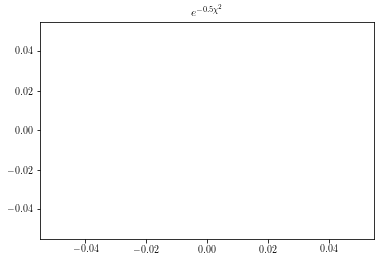

In [13]:
chi2_array_ALL_DATA_4k = chi2_array_ALL_DATA_4k-np.mean(chi2_array_ALL_DATA_4k)
plt.hist(np.exp(-0.5*chi2_array_ALL_DATA_4k))
plt.title('$e^{-0.5 \chi^2}$')

### clearly, the old method of calculating the weights does not work anymore, because the $\chi^2$ values are too large now so we cannot exponentiate them, hence we have to work in the log space.

In [35]:
chi2_array_ALL_DATA_4k.mean(), chi2_array_ALL_DATA_4k.std()

(12770.200285177548967, 525317.48879534142515)

In [36]:
chi2_array_ALL_DATA_4k.min(), chi2_array_ALL_DATA_4k.max(), chi2_array_ALL_DATA_4k.max()/chi2_array_ALL_DATA_4k.min()

(2073.9870203150235284, 79739609.97136621177, 38447.497110784399016)

$\chi^2$ value is expected to be around $~N_{DOF} = 4000-14$

If we do the same method of calculating the weights we run into this problem of getting zeros for the weights since the $\chi^2$ values are really large. But recall that the weights are 

$$w_k^i = \frac{L(\theta)}{L'(\theta)} = \frac{N_{samples} exp^{-\frac{1}{2} (\chi_k ^2 - E[\chi^2])}}{\mathcal{N}(\theta_i;\mu_i, \sigma_i) \ \sum_{k=1}^{N_{samples}} w_k}$$

And we don't care about the overall large constant that is multiplying all the weights, we only care about the differences in weights between the data points. Therefore we can take the log of both sides

$$log w_k^i = log \frac{L(\theta)}{L'(\theta)} = log L(\theta) - log L'(\theta) = log [N_{samples} exp^{-\frac{1}{2} (\chi_k ^2 - E[\chi^2])} ] - log[ \mathcal{N}(\theta_i;\mu_i, \sigma_i) \ \sum_{k=1}^{N_{samples}} w_k] \ \ \ \ \ \ (1)$$

$log w = -\frac{1}{2} [\chi^2 - (z-\mu)^{T} \Sigma^{-1}(z-\mu) ]$

Define 

second term = $(z-\mu)^{T} \Sigma^{-1}(z-\mu)$

Text(0.5, 1.0, 'Second Term')

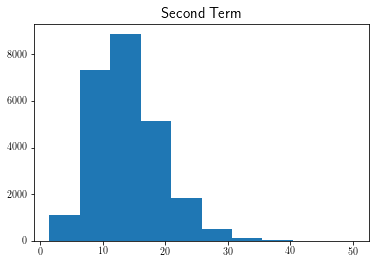

In [13]:
# z = MVN_per_point_l
mu = params_MASTER
sigma = COV_MASTER
second_term_l = []
for i in range(MVN_4000_MASTER.shape[0]):
    second_term = (MVN_4000_MASTER[i,:] - mu).T @ np.linalg.inv(sigma) @ (MVN_4000_MASTER[i,:] - mu)
    second_term_l.append(second_term)
plt.hist(np.array(second_term_l))# second term dist is much narrower, which is what we expect
plt.title('Second Term', fontsize=15)

Let's look at the $\chi^2$ distribution within $2\sigma$ around the best fit  values of the parameters.

In [37]:
list_of_tuples = []; 
MVG_within_1_sigma=[]
chi2_within_1_sigma=[] #np.empty((4000,14))
for i in range(14):
    param_list_i=[]
    chi2_list=[]
#     weight_list_i = []
    chi2_list_param_i=[]
    for k in range(4000):
        param_value = MVN_4000_MASTER[k, i] #at the kth point, for parameter i
        
        MVG_point_within_1s = MVN_per_point_l[k]
        #std = np.std(MVN_per_point_l)
        #mean_MVG = np.mean(MVN_per_point_l)
        
        std_MVN_value = np.std(MVN_4000_MASTER[:,i])
        mean_MVN_value = np.mean(MVN_4000_MASTER[:,i])
        if (param_value > (mean_MVN_value - 1*std_MVN_value)) and (param_value < (mean_MVN_value + 1*std_MVN_value)):
            #if weight_value < (mean_weight + 4*std_weight_value):

            #param_list_i.append(param_value)
            param_list_i.append(MVG_point_within_1s)
            chi2_list_param_i.append(chi2_array_ALL_DATA_4k[k])
    MVG_within_1_sigma.append(param_list_i)
    chi2_within_1_sigma.append(chi2_list_param_i)
            #chi2_within_1_sigma[k,i] = chi2_array_ALL_DATA_4k[k]
    tuple_i = (param_list_i, chi2_list)
    list_of_tuples.append(tuple_i)
#len(list_of_tuples)                
#list_of_tuples[1]

In [38]:
np.mean(chi2_within_1_sigma[0]), np.mean(chi2_within_1_sigma[2]), np.mean(chi2_within_1_sigma[3])

(16335.242943998040163, 15195.242117527751522, 16017.28134171117378)

Same means of $\chi^2$ for each parameter, as we expect.

Still the weird behavior of the $\chi^2$ values being very large 

(array([2.4076e+04, 6.5000e+02, 1.6700e+02, 6.1000e+01, 2.7000e+01,
        1.0000e+01, 6.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1.98516452e+06, 7.44368151e+15, 1.48873630e+16, 2.23310445e+16,
        2.97747260e+16, 3.72184075e+16, 4.46620890e+16, 5.21057705e+16,
        5.95494520e+16, 6.69931335e+16, 7.44368151e+16]),
 <BarContainer object of 10 artists>)

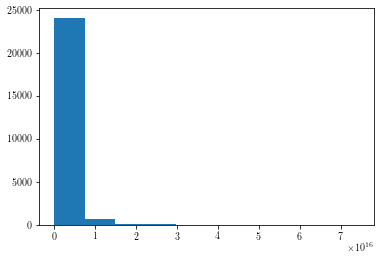

In [76]:
plt.hist(MVN_per_point_l)

In [81]:
best_fitchi2_25k =3369.427
#subtract chi^2(best-fit)
chi2_array_ALL_DATA_4k_diff = chi2_array_ALL_DATA_4k - np.mean(chi2_array_ALL_DATA_4k)
#subtract chi^2 mean
chi2_array_ALL_DATA_4k_diff_param_1 =chi2_array_ALL_DATA_4k_diff- best_fitchi2_25k
chi2_array_ALL_DATA_4k_diff_param_1

array([-13141.5202684 , -11822.16670859,  10508.08589713, ...,
        -8756.82881442,  -3370.71121681, -12934.31660864])

In [110]:
def MVG_BestFit(MVN, mu, sigma):
    """
    The density function of multivariate normal distribution.
    N = size of the mean vector, or number of parameter points (14)
    MVN = the 2D MV Gaussian function
    sigma = the covariance matrix from our best-fit values
    """

#     MVN_per_point_l=[]

    #z = np.atleast_2d(z)
    z = MVN


    N = z.size

    temp1 = np.linalg.det(sigma) ** (-1/2)
    temp2 = np.exp(-.5 * (z - mu).T @ np.linalg.inv(sigma) @ (z - mu))
    MVN_per_point = (2 * np.pi) ** (-N/2) * temp1 * temp2

    return MVN_per_point

In [90]:
MVG_best_fit = MVG_BestFit(params_MASTER, params_MASTER, COV_MASTER)
MVG_best_fit

1.557706340054779e+17

In [111]:
#subtract MVG(best-fit)
MVN_per_point_l_diff = MVN_per_point_l - MVG_best_fit
MVN_per_point_l_diff

array([-1.55613341e+17, -1.55736740e+17, -1.55641448e+17, ...,
       -1.55582876e+17, -1.55707644e+17, -1.55767098e+17])

In [92]:
#subtract mean
MVN_per_point_l_diff_min = MVN_per_point_l_diff - np.mean(MVN_per_point_l_diff)
MVN_per_point_l_diff_min

array([-1.09561510e+15, -1.21901412e+15, -1.12372138e+15, ...,
       -1.06514992e+15, -1.18991749e+15, -1.24937140e+15])

(array([2.4076e+04, 6.5000e+02, 1.6700e+02, 6.1000e+01, 2.7000e+01,
        1.0000e+01, 6.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-1.25290782e+15,  6.19077368e+15,  1.36344552e+16,  2.10781367e+16,
         2.85218182e+16,  3.59654997e+16,  4.34091812e+16,  5.08528627e+16,
         5.82965442e+16,  6.57402257e+16,  7.31839072e+16]),
 <BarContainer object of 10 artists>)

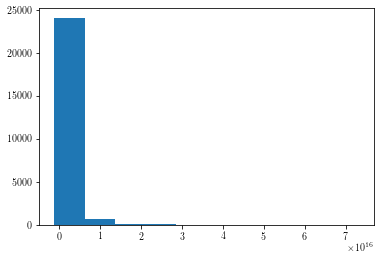

In [96]:
plt.hist(MVN_per_point_l_diff_min)

In [114]:
#take only positive values so that we dont get error when computing log
MVN_per_point_l = MVN_per_point_l - np.mean(MVN_per_point_l)

MVN_per_point_l_pos = MVN_per_point_l[MVN_per_point_l >0]


plt.hist(MVN_4000_MASTER[:,1][MVN_per_point_l_diff_min >0], weights=weight_param_1_normalized, bins=100, label='Reweighted', alpha=0.3, density=True, range=(0.07, 0.08))
plt.hist(MVN_4000_MASTER[:,1][MVN_per_point_l_diff_min >0], bins=100, label='Gaussian',  alpha=0.3, density=True,range=(0.07, 0.08))
plt.legend()

positive_MVN_per_point_l_diff = MVN_per_point_l_diff[MVN_per_point_l_diff >0]

positive_chi2_array_ALL_DATA_4k_diff_param_1 = chi2_array_ALL_DATA_4k_diff_param_1[MVN_per_point_l_diff >0]; positive_chi2_array_ALL_DATA_4k_diff_param_1

array([], dtype=float64)

In [100]:
#take only positive values so that we dont get error when computing log

positive_MVN_per_point_l_diff_min = MVN_per_point_l_diff_min[MVN_per_point_l_diff_min >0]

positive_chi2_array_ALL_DATA_4k_diff_param_1 = chi2_array_ALL_DATA_4k_diff_param_1[MVN_per_point_l_diff_min >0]

In [113]:

log_weight_param_1 = (-0.5*positive_chi2_array_ALL_DATA_4k_diff_param_1)/np.log(positive_MVN_per_point_l_diff)
log_weight_param_1

array([], dtype=float64)

In [103]:

log_weight_param_1 = (-0.5*positive_chi2_array_ALL_DATA_4k_diff_param_1)/np.log(positive_MVN_per_point_l_diff_min)
log_weight_param_1

array([175.77772385, 166.13936489, 131.77442182, ..., 159.6418387 ,
       177.11415721, 183.24518722])

In [104]:
weight_param_1 = np.exp(log_weight_param_1)

weight_param_1_normalized = len(weight_param_1) * weight_param_1/np.sum(weight_param_1)
weight_param_1_normalized

array([3.62856164e-31, 2.36509393e-35, 2.81412410e-50, ...,
       3.56458211e-38, 1.38082975e-30, 6.35056898e-28])

In [105]:
# weight_param_1 = len(weight_param_1) * weight_param_1/np.sum(weight_param_1)
# weight_param_1

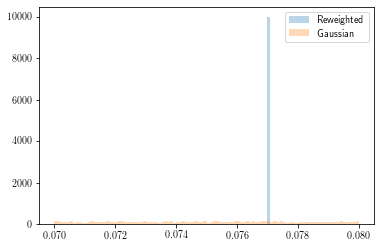

In [109]:
plt.hist(MVN_4000_MASTER[:,1][MVN_per_point_l_diff_min >0], weights=weight_param_1_normalized, bins=100, label='Reweighted', alpha=0.3, density=True, range=(0.07, 0.08))
plt.hist(MVN_4000_MASTER[:,1][MVN_per_point_l_diff_min >0], bins=100, label='Gaussian',  alpha=0.3, density=True,range=(0.07, 0.08))
plt.legend()

# Do it in one step

In [129]:
MVN_per_point_l_diff_mean[MVN_per_point_l_diff_mean <0]

array([-1.09561510e+15, -1.21901412e+15, -1.12372138e+15, ...,
       -1.06514992e+15, -1.18991749e+15, -1.24937140e+15], dtype=float128)

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log


((25000,), (25000,))

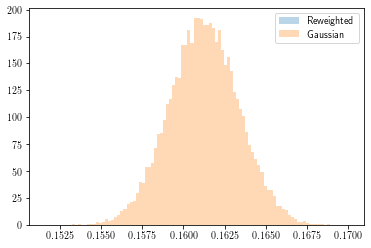

In [132]:
chi2_array_ALL_DATA_4k = chi2_array_ALL_DATA_4k.astype(np.float128)
MVN_4000_MASTER = MVN_4000_MASTER.astype(np.float128)

best_fitchi2_25k =3369.427
MVG_best_fit = MVG_BestFit(params_MASTER, params_MASTER, COV_MASTER)

MVN_per_point_l = f(MVN_4000_MASTER, params_MASTER, COV_MASTER)
#first step is masking both to take only positive values of MVG
# pos_MVN_per_point_l = MVN_per_point_l[MVN_per_point_l > 0]

# pos_chi2 = chi2_array_ALL_DATA_4k[MVN_per_point_l > 0]

#now subtract best-fit values of chi2 and MVG
# MVN_per_point_l = MVN_per_point_l - MVG_best_fit
# pos_chi2 = pos_chi2 - best_fitchi2_25k

#now subtract the mean from both chi2 and MVG
MVN_per_point_l_diff_mean = MVN_per_point_l - np.mean(MVN_per_point_l)

pos_chi2_diff_mean =pos_chi2 - np.mean(pos_chi2)


#HERE is where the positive masking should be done (right before taking the log)
MVN_per_point_l_diff_mean_pos = MVN_per_point_l_diff_mean[MVN_per_point_l_diff_mean > 0]
pos_chi2_diff_mean_pos = pos_chi2_diff_mean[MVN_per_point_l_diff_mean > 0]

#now calculate the log weight
log_weight_unnormalized = (-0.5 * pos_chi2_diff_mean_pos) - (np.log(MVN_per_point_l_diff_mean_pos))

weight_unnormalized = np.exp(log_weight_unnormalized)

weight_normalized = len(weight_unnormalized) * log_weight_unnormalized/np.sum(weight_unnormalized)

MVN_param_1_pos = MVN_4000_MASTER[:,0][MVN_per_point_l > 0]

plt.hist(MVN_param_1_pos, weights=weight_normalized, bins=100, label='Reweighted', alpha=0.3, density=True)
plt.hist(MVN_param_1_pos, bins=100, label='Gaussian',  alpha=0.3, density=True)
plt.legend()
MVN_param_1_pos.shape, weight_normalized.shape

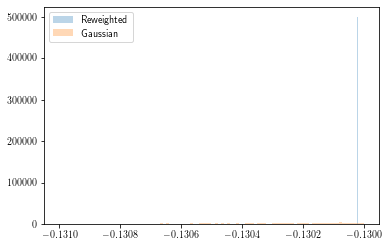

In [74]:


plt.hist(MVN_4000_MASTER[:,2], weights=weight_param_1, bins=100, label='Reweighted', alpha=0.3, density=True, range=(-0.1302,-0.130))
plt.hist(MVN_4000_MASTER[:,2], bins=100, label='Gaussian',  alpha=0.3, density=True, range=(-0.131,-0.130))
plt.legend()

In [33]:
np.mean(MVG_within_1_sigma[0]), np.mean(MVG_within_1_sigma[2]), np.mean(MVG_within_1_sigma[3])

(1594283065219208.0, 1559230864092711.5, 1556336458237995.5)

In [25]:
np.log(np.mean(MVG_within_1_sigma[0]))

35.0052005412063

(array([4.000e+00, 5.000e+01, 5.600e+02, 2.825e+03, 6.973e+03, 8.256e+03,
        4.789e+03, 1.366e+03, 1.660e+02, 1.100e+01]),
 array([0.15156416, 0.1534104 , 0.15525665, 0.15710289, 0.15894913,
        0.16079537, 0.16264161, 0.16448785, 0.1663341 , 0.16818034,
        0.17002658], dtype=float128),
 <BarContainer object of 10 artists>)

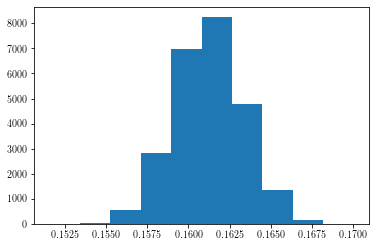

In [26]:
param_1 = MVN_4000_MASTER[:,0]
weight_1 = 
plt.hist(param_1)

Suppose we just have a 2D example. Suppose the entire parameterization is composed of two parameters $\vec{\theta} = \{ \theta_1, \theta_2 \}$. Suppose then we have two data points {point 1, point 2}. Then we have the best-fit values

$$\hat{\theta} = \{ \hat{\theta}_1, \hat{\theta}_2 \}$$
$$\hat{\Sigma} = \hat{\Sigma}_{2\times 2} $$

We then generate multivariate Gaussian sampling for the two data points using $\hat{\theta} $ and $\hat{\Sigma}$
$$\mathcal{N}_{sample} ( \vec{\mu} = \vec{\hat{\theta}}, \Sigma = \hat{\Sigma} )$$

And we use this as input to xfitter, so we get a $\chi^2$ value for each point (dataset k) $\chi^{2,k}$ and a single multivariate Gaussian point for the parameters at that point $\mathcal{N}_{\text{per point}}$ so that the multivariate Gaussian for the first point is 

$$ \mathcal{N}^{\text{point 1}} = \mathcal{N} \left( \vec{x} = \{ \theta_{sample, 1}^1, \theta_{sample , 2}^1 \} \ \big| \ \vec{\mu} = \hat{\vec{\theta}}, \Sigma = \hat{\Sigma} \right) $$

Hence we get a set of values for each data point. SO for the first data point, we have a associated
$$ D^1 = \left\{ \theta_{sample, 1}^1, \ \theta_{sample, 2}^1, \chi^{2,1}, \mathcal{N}^{\text{point 1}} \right\} $$

Hence the weight for the first point (data set) is 
$$ w^1 = \mathcal{A} \frac{ e^{-\frac{1}{2}  \chi^{2,1} }}{\mathcal{N}^{\text{point 1}} } $$
where $\mathcal{A}$ is a normalization constant.

We see here that there is huge dynamic range discrepancies between the numerator and the denomenator of the weight, and hence the weight values are not reasonable. Perhaps $\chi^2$ values are per dataset? 

Text(0.5, 1.0, '$\\chi^2$ values within $1\\ \\sigma$ of the best-fit values of the parameters')

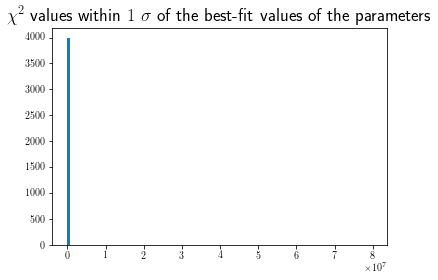

In [19]:
plt.hist(chi2_within_1_sigma[0], bins=100)
plt.title('$\chi^2$ values within $1\ \sigma$ of the best-fit values of the parameters', fontsize=18)

In [20]:
len(MVG_within_1_sigma), len(MVG_within_1_sigma[0])

(14, 4000)

Text(0.5, 1.0, 'MVG parameter values within $1\\ \\sigma$ of the best-fit values of the parameters')

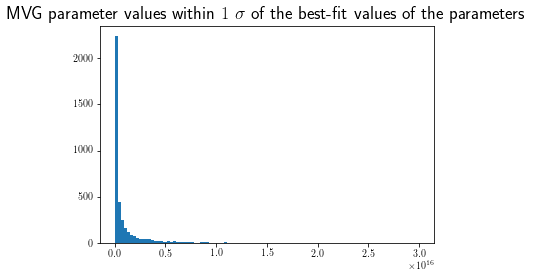

In [21]:
plt.hist(MVG_within_1_sigma[0], bins=100, range=(0,3e16))
plt.title('MVG parameter values within $1\ \sigma$ of the best-fit values of the parameters', fontsize=18)

Around the peak of the multivariate Gaussian, we expect this approximation to work and the $\chi^2$ values not to be so large.

In [22]:
chi2_array_ALL_DATA_4k - np.mean(chi2_array_ALL_DATA_4k)

array([-9.77209327e+03, -8.45273971e+03,  1.38775129e+04, ...,
       -5.38740181e+03, -1.28421681e+00, -9.56488961e+03], dtype=float128)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.4998e+04]),
 array([-3.98634065e+07, -3.58765294e+07, -3.18896524e+07, -2.79027753e+07,
        -2.39158983e+07, -1.99290212e+07, -1.59421442e+07, -1.19552671e+07,
        -7.96839007e+06, -3.98151302e+06,  5.36403151e+03], dtype=float128),
 <BarContainer object of 10 artists>)

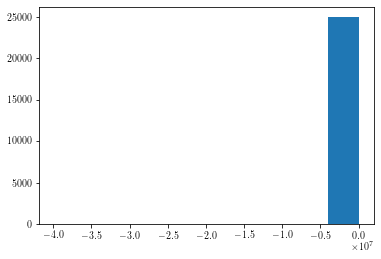

In [25]:
chi2_diff = chi2_array_ALL_DATA_4k - np.mean(chi2_array_ALL_DATA_4k)
w = -0.5*(chi2_diff-np.array(second_term_l))
plt.hist(w)

In [55]:
np.mean(chi2_diff)

-1.2732925824820995331e-14

In [18]:
mean_chi2 = np.mean(chi2_array_ALL_DATA_4k)
chi2_best_fit = 3369.427
#remember to rename diff (no need to take diff at this point)
# chi2_diff = chi2_array_ALL_DATA_4k - mean_chi2
chi2_diff = chi2_array_ALL_DATA_4k - chi2_best_fit

chi2_diff = chi2_diff - np.mean(chi2_diff)

log_numerator = -0.5*chi2_diff
log_numerator.shape
# for i in range(14):
#     log_numerator[:,i] =  - 0.5 * (chi2_diff)
# log_numerator #no normalization factor
log_numerator, np.mean(log_numerator)

(array([ 4.88604663e+03,  4.22636985e+03, -6.93875645e+03, ...,
         2.69370091e+03,  6.42108406e-01,  4.78244480e+03]),
 6.51925802230835e-13)

In [19]:
# log_numerator = log_numerator - np.mean(log_numerator)
# log_numerator

In [85]:
np.log(MVN_per_point_l)

array([35.32073269, 32.90517785, 32.81993112, ..., 34.87679871,
       30.89499864, 28.34919446])

### Remember (from above)

#### log numerator $ = -\frac{1}{2} \chi^2 (\vec{\theta_i} )$,  log denomenator $=log [MVG(\vec{\theta_i})]$

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'log denomenator')

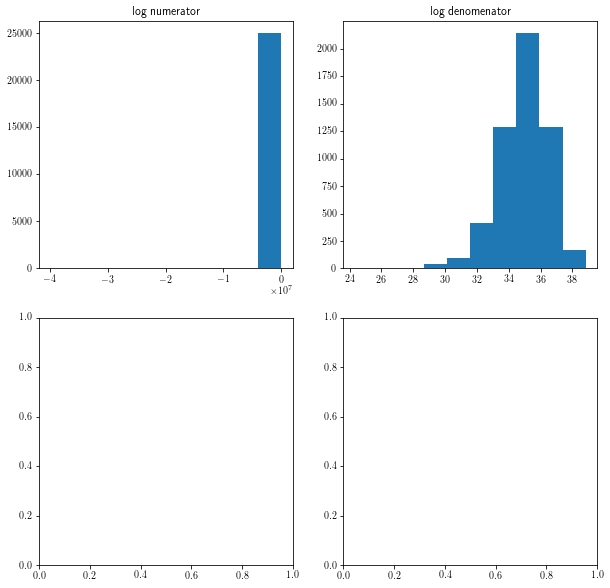

In [20]:
#plt.hist(log_numerator, range=(-10**6,0)) #this is equivalent to plt.hist(log_numerator/(e7), range=(-0.01,0))
# plt.title('log numerator')
MVN_per_point_l_diff = MVN_per_point_l - np.mean(MVN_per_point_l)
log_den = np.log(MVN_per_point_l_diff)
log_den.shape
# plt.hist(log_den)
# plt.title('log denomenator')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes[0,0].hist(log_numerator); axes[0,0].set_title('log numerator')
axes[0,1].hist(log_den); axes[0,1].set_title('log denomenator')

# axes[1,0].hist(-0.5*np.array(chi2_within_1_sigma[0])); axes[1,0].set_title('log numerator within 1 sigma of best-fit values')
# axes[1,1].hist(np.log(MVG_within_1_sigma[0])); axes[1,1].set_title('log denomenator within 1 sigma of best-fit values')



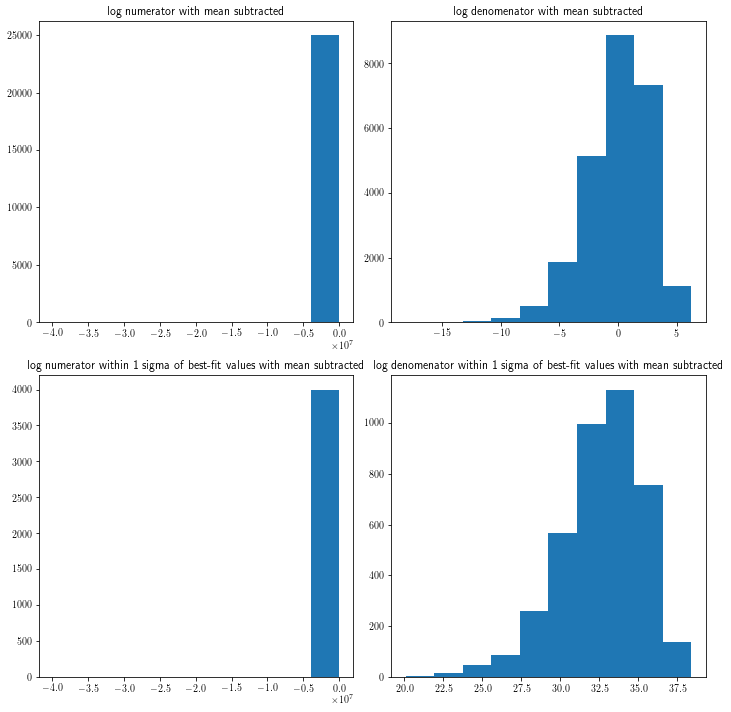

In [30]:
#plt.hist(log_numerator, range=(-10**6,0)) #this is equivalent to plt.hist(log_numerator/(e7), range=(-0.01,0))
# plt.title('log numerator')
log_den = np.log(MVN_per_point_l)
log_den = log_den- np.mean(log_den)


chi2_within_1_sigma[0] = np.array(chi2_within_1_sigma[0]) - np.mean(np.array(chi2_within_1_sigma[0]))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes[0,0].hist(log_numerator); axes[0,0].set_title('log numerator with mean subtracted')
axes[0,1].hist(log_den); axes[0,1].set_title('log denomenator with mean subtracted')

axes[1,0].hist(-0.5*chi2_within_1_sigma[0]); axes[1,0].set_title('log numerator within 1 sigma of best-fit values with mean subtracted')
axes[1,1].hist(np.log(MVG_within_1_sigma[0])); axes[1,1].set_title('log denomenator within 1 sigma of best-fit values with mean subtracted')

plt.tight_layout()

Text(0.5, 1.0, 'log denomenator')

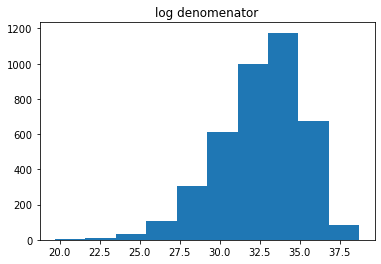

In [60]:
# def log_den(MVN_per_point_l):
#     log_den_l = []
#     for i in range(MVN_per_point_l.shape[0]):
#         log_den = np.log(MVN_per_point_l)



Let's try the weights without doing it in log space

In [116]:
chi2_array_ALL_DATA_4k = chi2_array_ALL_DATA_4k-np.mean(chi2_array_ALL_DATA_4k)
MVN_per_point_l = MVN_per_point_l - np.mean(MVN_per_point_l)
weights = np.exp(-0.5 * chi2_array_ALL_DATA_4k)/MVN_per_point_l
weights

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


array([             inf,             -inf,             -inf, ...,
                    inf,             -inf, -4.44980981e+274],
      dtype=float128)

(array([3999.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ],
       dtype=float128),
 <BarContainer object of 10 artists>)

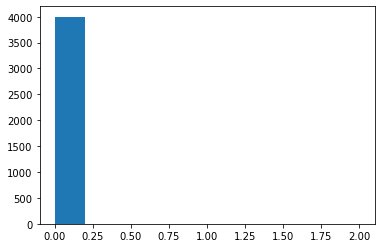

In [114]:
weights = 4000 * weights/np.sum(weights)
plt.hist(weights, range=(0,2))

(array([ 1.,  1.,  2.,  1.,  0.,  5.,  4.,  7., 12., 19.]),
 array([-0.01 , -0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003,
        -0.002, -0.001,  0.   ], dtype=float128),
 <BarContainer object of 10 artists>)

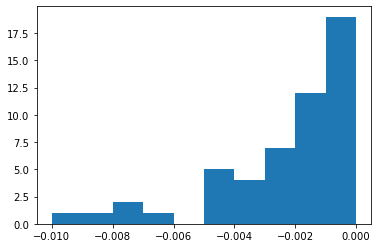

In [61]:
log_RHS = log_numerator - log_den
log_RHS, log_RHS.shape
plt.hist(log_RHS/(1e7), range=(-0.01,0))

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.999e+03]),
 array([-8.67315859e+07, -7.80559538e+07, -6.93803216e+07, -6.07046895e+07,
        -5.20290573e+07, -4.33534251e+07, -3.46777930e+07, -2.60021608e+07,
        -1.73265287e+07, -8.65089651e+06,  2.47356437e+04], dtype=float128),
 <BarContainer object of 10 artists>)

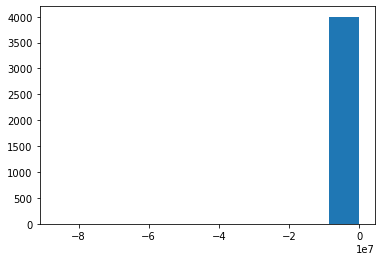

In [62]:
plt.hist(log_RHS)

In [36]:
mean_log_RHS = np.mean(log_RHS)
log_weight =log_RHS- mean_log_RHS
log_weight, log_weight.shape

(array([24068.75203129, 24044.67443657, 24078.10295406, ...,
        20455.39966799, 24123.37242144,   671.34495514], dtype=float128),
 (4000,))

In [41]:
mean_log_RHS

-32.55904404488593718

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.999e+03]),
 array([-8.67315534e+07, -7.80559212e+07, -6.93802891e+07, -6.07046569e+07,
        -5.20290247e+07, -4.33533926e+07, -3.46777604e+07, -2.60021283e+07,
        -1.73264961e+07, -8.65086395e+06,  2.47682028e+04], dtype=float128),
 <BarContainer object of 10 artists>)

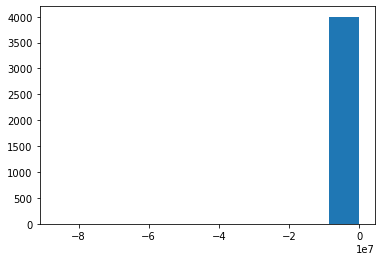

In [37]:
plt.hist(log_weight)

In [38]:
log_weight = MVN_4000_MASTER.shape[0] * log_weight/np.sum(log_weight)
log_weight+

array([8.82129091e+18, 8.81246638e+18, 8.82471806e+18, ...,
       7.49698326e+18, 8.84130949e+18, 2.46050528e+17], dtype=float128)

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


array([inf, inf, inf, ..., inf, inf, inf], dtype=float128)